## Домашнее задание

- Очистить текст "Война и мир", оставив только русские буквы и символы пробела. Построить матрицу переходных вероятностей. Посчитать вероятность встретить строку из 4-х символов, которая начинается на п, а кончается на р. Используя матрицу переходных вероятностей, сгенерировать слово, начинающееся с буквы "Б" и имеющее длину 8 символов
- Выбрать ряд (из Series) и оценить его через HMM. Попробовать "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [203]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Часть 1

**Чистим данные, оставляя только русские буквы и символы пробела.**

In [119]:
def clean_data(files):
    cleaned = ''
    for filename in files:
        data = filename.read_text(encoding='utf-8').lower()
        cleaned += re.sub(r'[^a-яё ]|[a-zA-Z0-9{}]', '', data)
    return cleaned

In [120]:
text = clean_data(Path('War&Peace/').glob('tom*txt')).replace('»', '').replace('°', '').replace('«', '')

In [121]:
print(len(text))

2764441


In [122]:
text[:1200]

'лев толстойвойна и миртом   том часть перваячасть ораячасть третья  том лев николаевич толстойвойна и миртом часть первая е              поместья                                                       мой верный раб    ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист  я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте        я вижу что я вас пугаю садитесь и рассказывайтетак говорила в июле  года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано 

In [126]:
rus_alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(rus_alphabet)}

In [127]:
probabilities = np.zeros((len(rus_alphabet), len(rus_alphabet)))

In [128]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [129]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [132]:
df = pd.DataFrame(probabilities, index=(c for c in rus_alphabet), columns=(c for c in rus_alphabet))

**Строим матрицу переходных вероятностей**

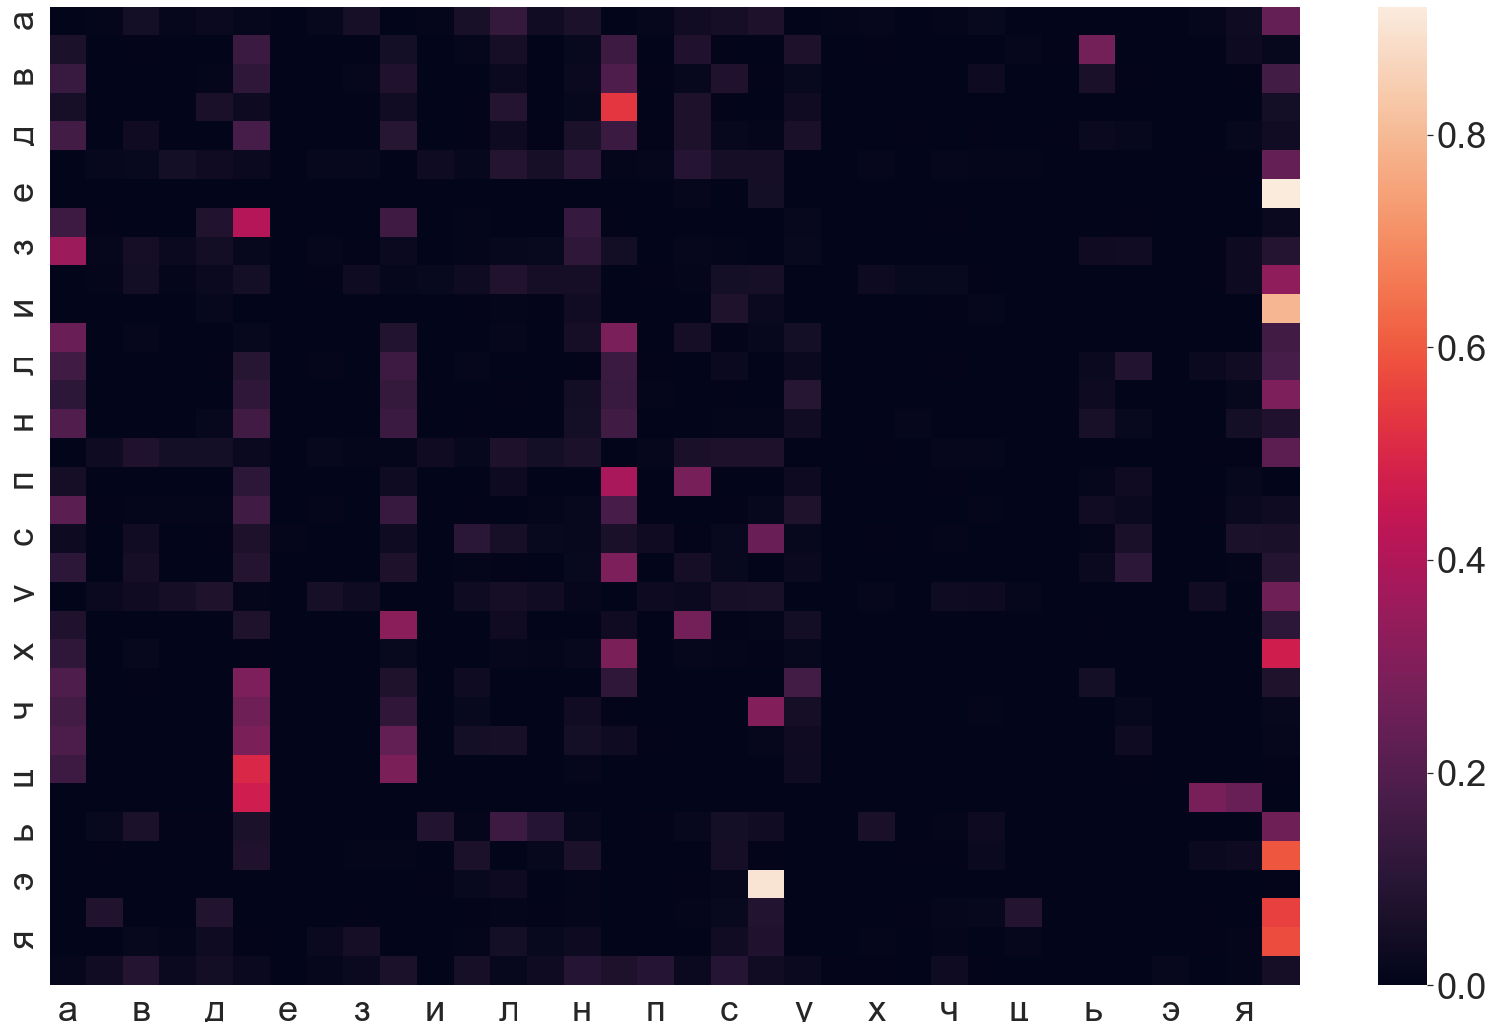

In [154]:
plt.figure(figsize=(28, 18))
sns.set(font_scale=3.3)
sns.heatmap(df)
plt.show()

**Находим вероятность встретить строку из 4-х символов, которая начинается на п, а кончается на р (учитывая пробелы).**

In [163]:
start = POS['п']
end = POS['р']
prior = 1. / len(rus_alphabet)
probas = list()
for c1 in rus_alphabet:
    for c2 in rus_alphabet:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            probas.append((''.join(['п', c1, c2, 'р']), proba))

for i, prob in enumerate(list(sorted(probas, key=lambda x: x[1], reverse=True))[:10]):
    print(f'#{i+1}:\t{prob[0]}: {prob[1]}"')

#1:	прер: 0.00011985973476310438"
#2:	прор: 9.147367042682817e-05"
#3:	прар: 7.43645140131875e-05"
#4:	по р: 6.000469108869473e-05"
#5:	потр: 4.228590463090975e-05"
#6:	попр: 4.141720191311109e-05"
#7:	погр: 3.84767361012238e-05"
#8:	подр: 3.817691323612121e-05"
#9:	побр: 2.9433951560885752e-05"
#10:	поер: 2.580608653130366e-05"


**Используя матрицу переходных вероятностей, сгенерируем слово, начинающееся с буквы "Б" и имеющее длину 8 символов (думаю, тут имеется ввиду все-таки маленькая буква "б").**

In [185]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(rus_alphabet), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

боваштсто


### Часть 2

**Будем рассматривать временной ряд *`Monthly sales of company X`*. Оценим его с помощью HMM**.

In [189]:
from hmmlearn.hmm import GaussianHMM

In [190]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")

In [191]:
series = list(all_series.values())[0]

In [192]:
values = series.values.reshape(-1,1)

In [204]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -516.1188153076023
2 -487.45859834487584
3 -465.47589432498626
4 -454.545327306303
5 -447.6622867808376
6

Fitting a model with 79 free scalar parameters with only 77 data points will result in a degenerate solution.


 -442.92067606971233
7 -433.2011958611597
8

Fitting a model with 98 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.


 -426.69352122099184
9 -422.04516114299264


Fitting a model with 142 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 77 data points will result in a degenerate solution.


10 -415.2820492582638
11 -410.67907240099487


Fitting a model with 194 free scalar parameters with only 77 data points will result in a degenerate solution.


12 -400.1031422012887
13 -392.33214131150027


Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.


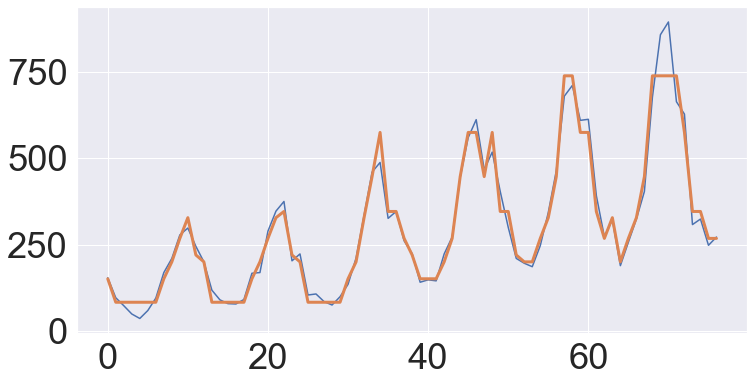

In [205]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.show()

**Построим через среднее каждой компоненты наивный прогноз ряда**,

исходя из того, что: $Y(t+i|t) = Y(t)$

In [235]:
df = pd.concat([pd.DataFrame(means), pd.DataFrame(means).shift(1).fillna(0)], axis=1)
df.columns = ['t', 't+1']
print(df.head(5))

     t    t+1
0  151    0.0
1   83  151.0
2   83   83.0
3   83   83.0
4   83   83.0


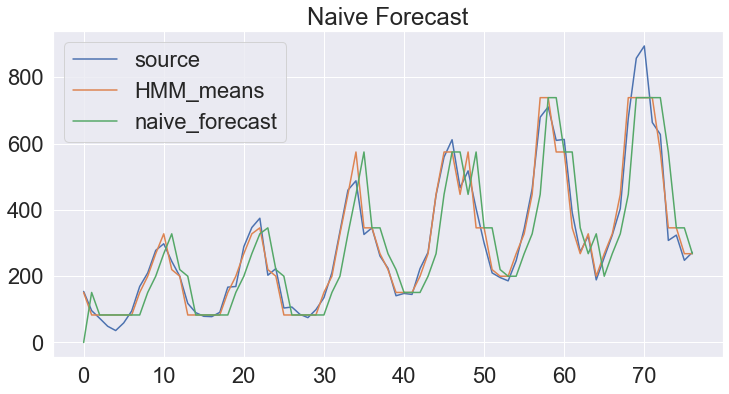

In [236]:
plt.figure(figsize=(12, 6))
plt.plot(values, label='source')
sns.set(font_scale=2)
plt.plot(df['t'], label='HMM_means')
plt.plot(df['t+1'], label='naive_forecast')
plt.legend(loc='best')
plt.grid(True)
plt.title("Naive Forecast")
plt.show()